In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.constants import hbar

#### Question 5
$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$
Define constants $B_{2,0} = \frac{1}{\hbar}\cdot 10^{9} \ J^{-1}s^{-2}$, $\omega_1 = \hbar B_{2,0}$, $\omega = 18\cdot 10^{9} \ Hz$, $T = \frac{2\pi}{\omega} \ s$ for plotting and $dt$ as the timestep. 
We will use $$\hat{U}(t)\ket{\psi(0)} = \ket{\psi(t)} \text{ with } \hat{U}(dt) = \mathbb{1}-\frac{i}{\hbar}\hat{H}dt$$ 
So, starting with given initial condition $\ket{\psi(0)} = \ket{7/2, 7/2}$, we will compute $\ket{\psi(t+dt)}$ recursively for each timestep needed using the update
$$\implies \ket{\psi(t+dt)} = \hat{U}(dt)\ket{\psi(t)} = \left(\mathbb{1}_{8\times 8} -\frac{i}{\hbar}\hat{H}dt\right)\ket{\psi(t)} $$

$$\hat{H} = \hat{H_0} + \hat{H_1} = B_{2,0}\hbar^2 \left[\begin{smallmatrix}21 &&&&&&& \\ & 3 &&&&&& \\ && -9 &&&&& \\ &&& -15 &&&& \\ &&&& -15 &&& \\ &&&&& -9 && \\ &&&&&& 3 & \\ &&&&&&& 21\end{smallmatrix}\right] + 
\omega_1 \underbrace{\hbar \left[ \begin{smallmatrix}0 &\sqrt{7}e^{-i\omega t} & 0 &&&&& \\ \sqrt{7}e^{i\omega t} & 0 & \sqrt{12}e^{-i\omega t} & 0 &&&& \\ 0 &\sqrt{12}e^{i\omega t} & 0 & \sqrt{15}e^{-i\omega t} & 0 &&&\\ & 0 & \sqrt{15}e^{i\omega t} & 0 & 4e^{-i\omega t} & 0 && \\ & & 0 & 4e^{i\omega t} & 0 & \sqrt{15}e^{-i\omega t} & 0 & \\ &&& 0 & \sqrt{15}e^{i\omega t} & 0 & \sqrt{12}e^{-i\omega t} & 0 \\ &&&& 0 & \sqrt{12}e^{i\omega t} & 0 & \sqrt{7}e^{-i\omega t} \\ &&&&& 0 & \sqrt{7}e^{i\omega t} & 0
\end{smallmatrix} \right]}_{= e^{-i\omega t}\hat{J}_+ + e^{i\omega t}\hat{J}_-}$$

In [2]:
B = 1/hbar * 10**9 
w_1 = B *hbar 
w = 18*10**9 
dt = 10**(-14)
T = 2*np.pi/w

In [3]:
# spin Hamiltonian
H_0 = B*hbar**2*np.diag([21, 3, -9, -15, -15, -9, 3, 21])
# circular polarized light Hamiltonian 
shifteddiag = [np.sqrt(7), np.sqrt(12), np.sqrt(15), 4, np.sqrt(15), np.sqrt(12), np.sqrt(7)]
def H_1(t): 
    return w_1*hbar*np.diag(shifteddiag, k=1)*np.exp(-1j*w*t) + w_1*hbar*np.diag(shifteddiag, k=-1)*np.exp(1j*w*t)
# total Hamiltonian 
def H(t): 
    return H_0 + H_1(t)

In [4]:
# initialization data |7/2, 7/2>
invec = np.reshape(np.matrix([1,0,0,0,0,0,0,0]), (8,1))
resultvec = np.reshape(np.matrix([0,1,0,0,0,0,0,0]), (8,1))

Function taking in parameters `t_end`, `invec` and `resultvec`: 
* compute all $\ket{\psi(t)}$ up to time `t_end` given previously defined $\ket{\psi(0)} = \ket{7/2, 7/2}$ `invec` 
* compute the probability of finding the system in $\ket{\psi(t)} = \ket{7/2, 5/2} = [0,1,0,0,0,0,0,0]^T$ (`resultvec`) 
$$P = \left| \ket{7/2, 5/2}^\dagger \cdot \ket{\psi(t)} \right|^2 = \left| \ket{7/2, 5/2}^T \cdot \ket{\psi(t)} \right|^2 $$
* outputs `(times, vecs, probs)` where `vecs` and `probs` are respectively the state and probability at each timestep, and `times` just to make life easier for plotting.

In [5]:
def project(psi, onto): 
    return np.float(np.abs(np.dot(onto.T, psi))**2)

In [6]:
def psi(t_end, invec, resultvec): 
    count=0 
    vec = invec
    times = [0]
    vecs = [vec]
    probs = [project(invec, resultvec)]
    while count <= t_end: 
        count += dt
        times.append(count)
        vec = np.dot((np.identity(8) - (1j/hbar)*H(count)*dt), vec)
        prob = project(vec, resultvec)
        vecs.append(vec)
        probs.append(prob)
    return (times,vecs, probs)

Plot the probabilities for $t \in [0, T]$

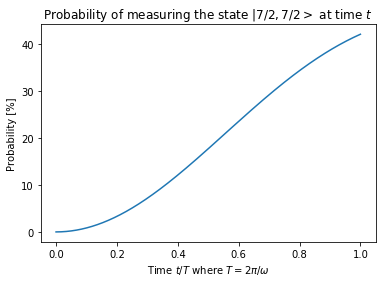

In [7]:
trange, _, probabilities = psi(T, invec, resultvec)
plt.plot(np.array(trange)/T, np.array(probabilities)*100)
plt.xlabel('Time $t /T$ where $T = 2\pi/\omega$')
plt.ylabel('Probability [%]')
plt.title('Probability of measuring the state $|7/2, 7/2>$ at time $t$')
plt.show()

#### Question 6
Using the ansatz $\ket{\psi(t)} = \sum_m c_m(t)\ket{7/2, m} \to \sum_m d_m(t)e^{-i\frac{\hat{J_z}}{\hbar}\omega t} \ket{7/2, m}$, and noticing that $e^{-i\frac{\hat{J_z}}{\hbar}\omega t}$ is simply the rotation matrix $\hat{R_z} (\theta = \omega t)$ which has eigenvectors $\ket{7/2, m}$, we can simplify the original time-dependent Schrödinger Equation 
$$ i\hbar \frac{d}{dt}\sum_m d_m(t) e^{-i\frac{\hat{J_z}}{\hbar}\omega t} \ket{7/2, m} = \hat{H} \sum_m d_m(t) e^{-i\frac{\hat{J_z}}{\hbar}\omega t} \ket{7/2, m}$$
into a new time-independent Schrödinger-Equation for the $d_m(t)$ terms 
$$ i \hbar \frac{d}{dt} \sum_m d_m(t) = \hat{H}_{eff} \sum_m d_m(t)$$
with effective Hamiltonian 
$$\hat{H}_{eff} = \left[ \begin{smallmatrix}21B_{2,0}\hbar^2 - \hbar\omega \frac{7}{2} & \sqrt{7} \hbar\omega_1 & 0 &&&& \\ 
\sqrt{7} \hbar\omega_1 & 3B_{2,0}\hbar^2 - \hbar\omega \frac{5}{2} & \sqrt{12} \hbar\omega_1 & 0 &&&& \\ 
0 & \sqrt{12} \hbar\omega_1 & -9B_{2,0}\hbar^2 - \hbar\omega \frac{3}{2}  & \sqrt{15} \hbar\omega_1 & 0 &&& \\ 
& 0 & \sqrt{15} \hbar\omega_1 & -15B_{2,0}\hbar^2- \hbar\omega \frac{1}{2}  & 4 \hbar\omega_1 & 0 && \\ 
&& 0 & 4 \hbar\omega_1& -15B_{2,0}\hbar^2+ \hbar\omega \frac{1}{2}  & \sqrt{15} \hbar\omega_1& 0 & \\ 
&&& 0 & \sqrt{15} \hbar\omega_1 & -9B_{2,0}\hbar^2 + \hbar\omega \frac{3}{2} & \sqrt{12} \hbar\omega_1 & 0\\ 
&&&& 0 & \sqrt{12} \hbar\omega_1 & 3B_{2,0}\hbar^2 + \hbar\omega \frac{5}{2} & \sqrt{7} \hbar\omega_1\\ 
&&&&& 0 & \sqrt{7} \hbar\omega_1 & 21B_{2,0}\hbar^2 + \hbar\omega \frac{7}{2} \end{smallmatrix} \right]$$

In [8]:
H_eff = H_0 - hbar*w*np.diag([7/2, 5/2, 3/2, 1/2, -1/2, -3/2, -5/2, -7/2], 
                     k=0) + w_1*hbar*np.diag(shifteddiag,k=1) + w_1*hbar*np.diag(shifteddiag, k=-1)

#### Question 7
We can find the eigenvalues and vectors of $\hat{H}_{eff}$

In [9]:
H_eff_evals, H_eff_evecs = np.linalg.eig(H_eff)
H_eff_evecs = [np.matrix(vec).T for vec in H_eff_evecs]
H_eff_evecs = [1/np.linalg.norm(vec)*vec for vec in H_eff_evecs]
for i in range(0, 8): 
    print('E'+str(i+1)+'=', H_eff_evals[i], '   |E'+str(i+1)+'>=', H_eff_evecs[i].T)

E1= -4.275084677164196e-24    |E1>= [[ 7.89739245e-01 -5.82454375e-01  1.92318198e-01  8.51454701e-03
  -1.96593988e-04 -2.75642089e-06  2.37268218e-08  1.13626169e-10]]
E2= -4.790171961903924e-24    |E2>= [[ 4.36223205e-01  7.53543504e-01  4.88245940e-01  5.90774107e-02
  -2.69453314e-03 -6.27437934e-05  8.08952693e-07  5.41962637e-09]]
E3= -3.720858843707998e-24    |E3>= [[-4.19141795e-01 -2.99726173e-01  7.99820913e-01  3.06565682e-01
  -2.80567401e-02 -1.08871805e-03  2.10470537e-05  1.97345753e-07]]
E4= -2.493291939257788e-24    |E4>= [[ 1.01004422e-01  5.52394283e-02 -2.88656488e-01  9.25301033e-01
  -2.16820885e-01 -1.51867424e-02  4.56876080e-04  6.11959140e-06]]
E5= -6.050202821770435e-25    |E5>= [[-1.17852129e-02 -5.63870142e-03  3.98135267e-02 -2.14177266e-01
  -9.62777741e-01 -1.59259560e-01  8.22685224e-03  1.65335264e-04]]
E6= 1.921919809830725e-24    |E6>= [[ 7.81534546e-04  3.45032122e-04 -2.90177291e-03  2.00000986e-02
   1.58582291e-01 -9.80448200e-01  1.14669323e-01

#### Question 8 
$\ket{\psi} = [v]_E$ in the eigenbasis is $[v]_E = S [v]_{original}$ where $S$ is the change of basis matrix 
$$S = \left[\begin{smallmatrix}| & | & | & | & | & | & | & | \\ 
[E_1] & E_2] & [E_3] & [E_4] & [E_5] & [E_6] & [E_7] & [E_8] \\ 
| & | & | & | & | & | & | & | \end{smallmatrix}\right]$$
Finding the linear combination of eigenstates which represents $\ket{\psi(0)}$ amounts to finding it in the eigenbasis $$\ket{\psi(0)}_E = S \ket{\psi(0)} = S \cdot [1,0,0,0,0,0,0,0]^T \ = E_1 \text{ in the eigenbasis}$$

In [10]:
S = np.concatenate(H_eff_evecs).reshape(8,8).T
invec_e = np.matmul(S, invec)
# print(np.all(invec_e == H_eff_evecs[0]))

Recall that the ansatz $$\ket{\psi(t)} = [c_m(t)] = T [d_m(t)] = T\ket{\tilde \psi(t)} \text{ where }  T = \left[e^{-im\omega t}\right] \text{ diagonal}$$ 
which makes the Schrödinger-Equation time independent. So The time dependence of $\ket{\tilde\psi(0)} = \sum_\lambda E_\lambda \ket{E_\lambda}$ satisfies 
$$ \ket{\tilde \psi(t)} = \hat{U}(t) \sum_\lambda E_\lambda \ket{E_\lambda} = \sum_\lambda E_\lambda e^{-\frac{i}{\hbar}E_\lambda t}\ket{E_\lambda}$$ i.e. in vector form, 
$$ [\tilde \psi(t)]_E = D [\psi(0)]_E \text{ where } D = \left[e^{-\frac{i}{\hbar}E_\lambda t} \ \forall\lambda \in [1,8]\right] \text{ diagonal}$$
where we also use that $\ket{\tilde \psi(0)} = \ket{\psi(0)}$ (all the exponential multiplicative terms are 1 at $t=0$).

In [11]:
def D(t): 
    return np.diag(np.exp(-(1j/hbar)*H_eff_evals*t))

To find the output vector, we must find $[\tilde \psi(t)]_E$, then convert back to the original basis and find the original $[\psi(t)]$ via $$[\psi(t)] = e^{-i\frac{\hat{J_z}}{\hbar}\omega t} S^{-1} [\tilde\psi(t)]_E = C S^{-1} D [\psi(0)]_E \text{ where } C = \left[ \begin{smallmatrix}e^{-i\frac{7}{2}\omega t} & & & & \\ & \ddots & & & \\ & & e^{-im\omega t} & \\ & & & \ddots & \\ & & & &  e^{i\frac{7}{2}\omega t} \end{smallmatrix} \right] \text{ to get back $c_m(t)$ terms from $d_m(t)$ terms }$$ 
and $S$ is the change of basis matrix (_to_ eigenbasis) defined above, $D$ is the diagonal time operation matrix defined above. 

#### Question 9 
We can project the output vector $\ket{\psi(t)}$ onto $\ket{7/2,5/2}$ to find the probability, as before.

In [12]:
def back_to_c(t):  
    return np.diag(np.array([np.exp(-1j*(7/2-i)*w*t) for i in range(8)]))

In [13]:
# a random testing cell 
# test = np.matmul(np.linalg.inv(S), np.matmul(D(0), invec_e))
# # testb = np.dot(np.linalg.inv(S),test)
# # project(np.matmul(back_to_c(0), testb), resultvec)
# print(np.allclose(test, invec))

In [14]:
def psi_eig(t, invec_e, resultvec): 
    outvec = np.matmul(D(t), invec_e)  # time evolution of d_m 
    outvec = np.matmul(np.linalg.inv(S), outvec) # back to original basis 
    outvec = np.matmul(back_to_c(t), outvec) # back to c_m 
    prob = project(outvec, resultvec) # probabilities
    return (outvec, prob)

In [15]:
tvals = np.linspace(0, T, num=100)
plotdata = np.array([psi_eig(t, invec_e, resultvec)[1] for t in tvals])

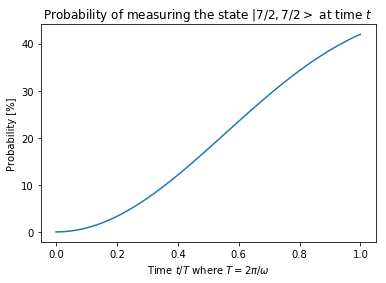

In [ ]:
plt.plot(np.array(tvals)/T, plotdata*100)
plt.xlabel('Time $t /T$ where $T = 2\pi/\omega$')
plt.ylabel('Probability [%]')
plt.title('Probability of measuring the state $|7/2, 7/2>$ at time $t$')
plt.show()

In [ ]:
dt= 10**(-13)
trange_check, _, probabilities_check = psi(30*T, invec, resultvec)

In [ ]:
tvals_check = np.linspace(0, 30*T, num=500)
plotdata_check = np.array([psi_eig(t, invec_e, resultvec)[1] for t in tvals_check])

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,5))
ax1.plot(np.array(trange_check)/T, np.array(probabilities_check)*100)
ax1.set_title('Probability of measuring $|7/2, 7/2>$ for $t\in [0, 30T]$ \n with the first method with $dt = 10^{-13}$')
ax1.set_xlabel('Time $t /T$ where $T = 2\pi/\omega$')
ax1.set_ylabel('Probability [%]')

ax2.plot(np.array(tvals_check)/T, plotdata_check*100)
ax2.set_xlabel('Time $t /T$ where $T = 2\pi/\omega$')
# ax2.ylabel('Probability [%]')
ax2.set_title('Probability of measuring $|7/2, 7/2>$ for $t \in [0, 30T]$ \n with the second method')

plt.show()

#### Question 10
The second method should be trusted more. for the first method, there is an error at each timestep, so as $t$ inceases, the final error is compounded and increases. The choice of $dt$ has a huge influence on the final result: a choice of $dt = 10^{-12}$ will cause the final probability to go up to above 100% for $t>5T$ whereas a smaller choice ($dt = 10^{-14}$) will have a smaller error. See above to see the error for the first method blowing up with $dt = 10^{-13}$. In comparison, the second method is a direct computation based on theoretical analysis and should not introduce any error (other than potentially from finding eigenvalues/vectors or inverting a matrix). 